In [1]:
from obspy.io.segy.core import _read_segy

In [2]:
from obspy.core.util import get_example_file

In [4]:
filename = 'H1.segy' 
st1 = _read_segy(filename)

In [5]:
st1

60 Trace(s) in Stream:

Seq. No. in line:    1 | 2017-09-21T09:40:44.000000Z - 2017-09-21T09:40:44.997500Z | 400.0 Hz, 400 samples
...
(58 other traces)
...
Seq. No. in line:   60 | 2017-09-21T09:40:44.000000Z - 2017-09-21T09:40:44.997500Z | 400.0 Hz, 400 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [6]:
st1[0].stats.segy.trace_header.data_use

0

In [7]:
st2 = _read_segy(filename, unpack_trace_headers=True)

In [20]:
np.shape(st2)

(60, 400)

In [8]:
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline  


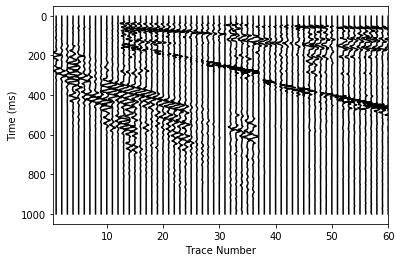

In [21]:
a0 = st2[0].data 
a1 = np.zeros([len(a0), 60]) 
t = np.linspace(1,len(a1), len(a1))*1/(400) 

for i in range(60):
    a2= st2[i].data  
    a2 = a2/np.max(np.abs(a2))  
    a1[:,i] = a2
    plt.plot(a2 + i +1, t*1000, 'k')  
    
plt.xlabel('Trace Number') 
plt.ylabel('Time (ms)') 
plt.xlim(0.5,60)
plt.gca().invert_yaxis()     
plt.savefig('data.png')

In [13]:
np.savetxt('data.csv', a1)